In [1]:
import warnings
from datetime import datetime
import itertools as IT
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud, STOPWORDS

warnings.filterwarnings('ignore')

# <b>Import the dataset

In [2]:
df = pd.read_csv('data/appstore_games.csv')
#Drop the feature which are not required
df = df.drop(columns=['URL', 'ID','Subtitle', 'Languages','In-app Purchases', 'Icon URL', 'Developer'], axis = 1)
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 11 columns):
Name                            17007 non-null object
Average User Rating             7561 non-null float64
User Rating Count               7561 non-null float64
Price                           16983 non-null float64
Description                     17007 non-null object
Age Rating                      17007 non-null object
Size                            17006 non-null float64
Primary Genre                   17007 non-null object
Genres                          17007 non-null object
Original Release Date           17007 non-null object
Current Version Release Date    17007 non-null object
dtypes: float64(4), object(7)
memory usage: 1.4+ MB


# <b>Drop NaN Rows and aggregate multiple genres into six basic genres

In [3]:
if((df.isnull().any()).any()):
    print(df.isnull().sum())
    df.replace('',np.nan, inplace=True)
    df=df.dropna()
    df = df.reset_index(drop=True)

Name                               0
Average User Rating             9446
User Rating Count               9446
Price                             24
Description                        0
Age Rating                         0
Size                               1
Primary Genre                      0
Genres                             0
Original Release Date              0
Current Version Release Date       0
dtype: int64


In [4]:
df.loc[df['Genres'].str.contains('Simulation') , 'Genres']='Simulation'
df.loc[df['Genres'].str.contains('Action') , 'Genres']='Action'
df.loc[df['Genres'].str.contains('Adventure') , 'Genres']='Adventure'
df.loc[df['Genres'].str.contains('Role') , 'Genres']='Adventure'
df.loc[df['Genres'].str.contains('Education') , 'Genres']='Family'
df.loc[df['Genres'].str.contains('Family') , 'Genres']='Family'
df.loc[df['Genres'].str.contains('Puzzle') , 'Genres']='Puzzle'
df.loc[df['Genres'].str.contains('Board') , 'Genres']='Puzzle'
df.loc[df['Genres'].str.contains('Puzzle') , 'Genres']='Puzzle'
df.loc[df['Genres'].str.contains('Strategy') , 'Genres']='Strategy'
df.Size = df.Size.mask(df.Size > 0, df.Size/ 1048576)
df['Genres'].value_counts()

Puzzle        2083
Strategy      1541
Simulation    1246
Adventure     1154
Action        1025
Family         512
Name: Genres, dtype: int64

# <b>Strip dd/mm/yyyy date format into just yyyy using python datetime library

In [5]:
date_frame = pd.DataFrame(columns=['Original Release Year', 'Current Version Release Year'])
for i,j in IT.zip_longest(df['Original Release Date'],df['Current Version Release Date']):
    date_object = datetime.strptime(str(i), '%d/%m/%Y')
    temp = date_object.strftime('%Y')
    date_object = datetime.strptime(str(j), '%d/%m/%Y')
    temp1 = date_object.strftime('%Y')
    date_frame = date_frame.append(pd.Series([temp, temp1], index=date_frame.columns ), ignore_index=True)

In [6]:
df = df.drop(['Original Release Date', 'Current Version Release Date'], axis=1)
df = df.join(date_frame)

# <b>Proportion plot for Genres<br>
## Which genre dominates the market?

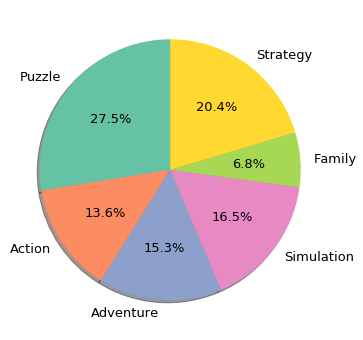

In [7]:
#genres
plt.figure(figsize=(10,6))
plt.rcParams['font.size'] = 13
cmap = plt.get_cmap('Set2')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
vals = [df.Genres[df['Genres']=='Puzzle'].count(), df.Genres[df['Genres']=='Action'].count(),df.Genres[df['Genres']=='Adventure'].count(),df.Genres[df['Genres']=='Simulation'].count(),
       df.Genres[df['Genres']=='Family'].count(),df.Genres[df['Genres']=='Strategy'].count()]
lbl = ['Puzzle', 'Action', 'Adventure', 'Simulation', 'Family', 'Strategy']
plt.pie(vals, labels=lbl,shadow=True,startangle=90,autopct='%.1f%%',colors=colors)
plt.show()

# <b>Proportion plot for Age Allowances<br>
## Which age group is targetted by developers?

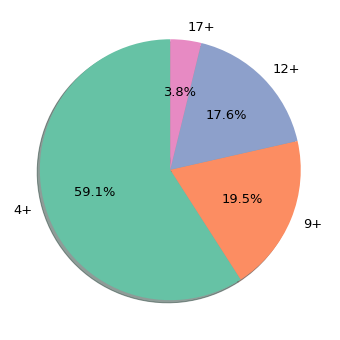

In [8]:
#Age allowances
plt.figure(figsize=(10,6))
lbl = ['4+', '9+', '12+', '17+']
vals = [df['Age Rating'][df['Age Rating']=='4+'].count(), 
        df['Age Rating'][df['Age Rating']=='9+'].count(),
        df['Age Rating'][df['Age Rating']=='12+'].count(),
        df['Age Rating'][df['Age Rating']=='17+'].count()]
plt.pie(vals, labels=lbl,shadow=True,startangle=90,autopct='%.1f%%',colors=colors)
plt.show()

# <b>Progress in size of games with time

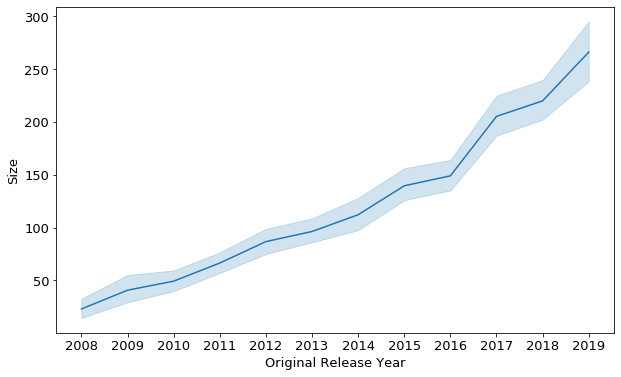

In [9]:
plt.figure(figsize=(10,6))
sns.lineplot(x = df['Original Release Year'], y = df['Size'])

# <b>Variation of Size w.r.t Price<br>
## What size of games are more costly?

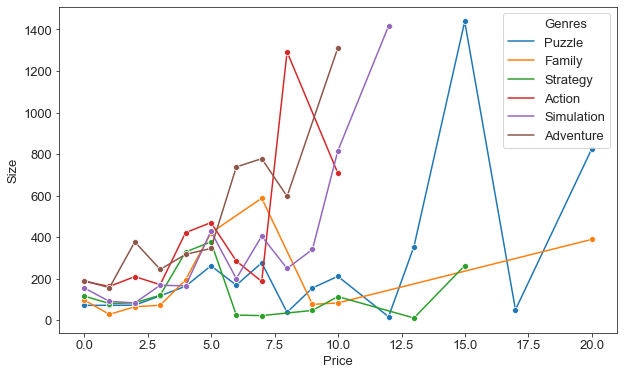

In [10]:
#Size and Price
sns.set_style('ticks')
plt.figure(figsize=(10,6))
sns.lineplot(x=df.Price[df.Price<20], y=df.Size, hue=df.Genres, err_style=None, marker='o')

# <b>User Rating for every Genre 

[(3.5, 4.5)]

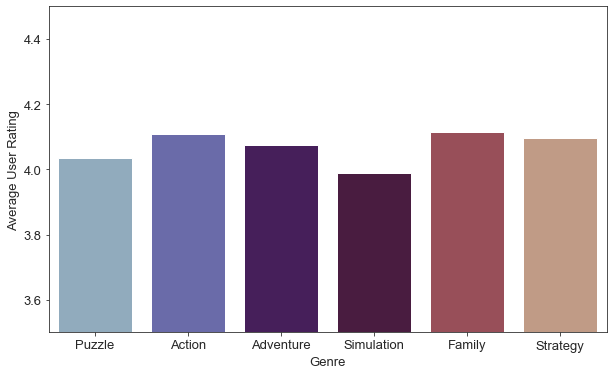

In [11]:
#user rating according to genre
plt.figure(figsize=(10,6))
lbl = ['Puzzle', 'Action', 'Adventure', 'Simulation', 'Family', 'Strategy']
vals = [df['Average User Rating'][df['Genres']=='Puzzle'].mean(), 
        df['Average User Rating'][df['Genres']=='Action'].mean(),
        df['Average User Rating'][df['Genres']=='Adventure'].mean(),
        df['Average User Rating'][df['Genres']=='Simulation'].mean(),
        df['Average User Rating'][df['Genres']=='Family'].mean(),
        df['Average User Rating'][df['Genres']=='Strategy'].mean()]
bp= sns.barplot(lbl,vals,palette='twilight')
bp.set(xlabel='Genre',ylabel='Average User Rating')
bp.set(ylim=(3.5,4.5))

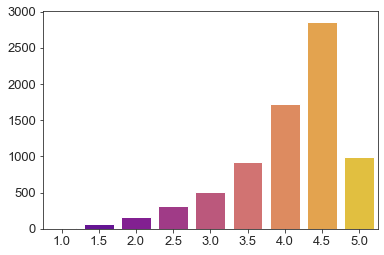

In [12]:
avg = df['Average User Rating'].value_counts().sort_index()
bp= sns.barplot(list(map(str, avg.index.values)),avg.values,data = avg,palette='plasma')

# <b>User Rating for Age groups

[(3.5, 4.5)]

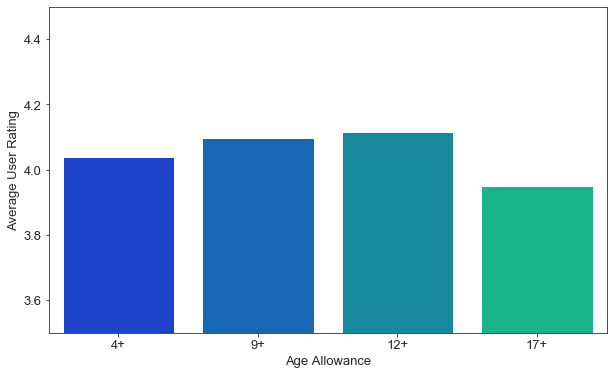

In [13]:
#user rating according to genre
plt.figure(figsize=(10,6))
lbl = ['4+', '9+', '12+', '17+']
vals = [df['Average User Rating'][df['Age Rating']=='4+'].mean(), 
        df['Average User Rating'][df['Age Rating']=='9+'].mean(),
        df['Average User Rating'][df['Age Rating']=='12+'].mean(),
        df['Average User Rating'][df['Age Rating']=='17+'].mean()]
bp= sns.barplot(lbl,vals,palette='winter')
bp.set(xlabel='Age Allowance',ylabel='Average User Rating')
bp.set(ylim=(3.5,4.5))

# <b>Paid vs Free w.r.t User Ratings<br>
## Are paid games better than free?

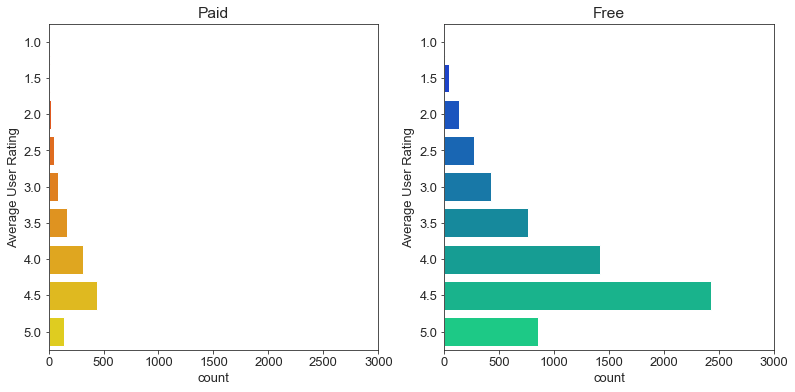

In [14]:
#paid vs free
paid = df[df['Price']>0]
free = df[df['Price']==0]
fig, ax = plt.subplots(1, 2, figsize=(13,6))
sns.countplot(data=paid, y='Average User Rating', ax=ax[0], palette='autumn')
ax[0].set_title('Paid')
ax[0].set_xlim([0, 3000])

sns.countplot(data=free, y='Average User Rating', ax=ax[1], palette='winter')
ax[1].set_title('Free')
ax[1].set_xlim([0,3000])
plt.show()

# <b> Average User Rating in each Genre considering Age Allowances

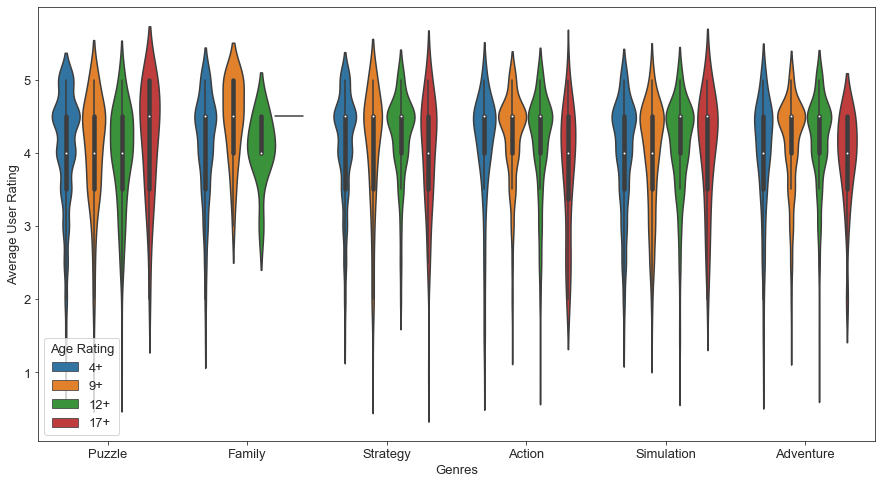

In [15]:
plt.figure(figsize=(15,8))
sns.violinplot(x='Genres',y='Average User Rating',hue='Age Rating',data=df)

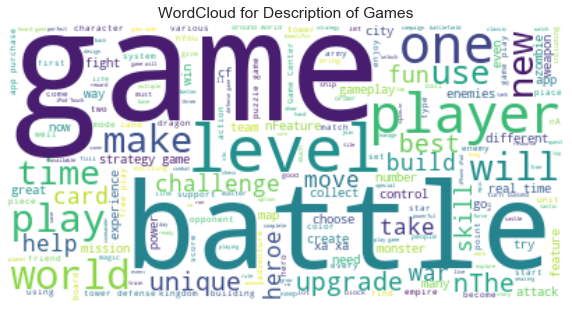

In [16]:
plt.figure(figsize=(10,6))
txt = " ".join(df.Description)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(regexp=r'[a-zA-Z]{2,}',stopwords=stopwords, background_color="white").generate(txt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("WordCloud for Description of Games")
plt.axis("off")
plt.show()

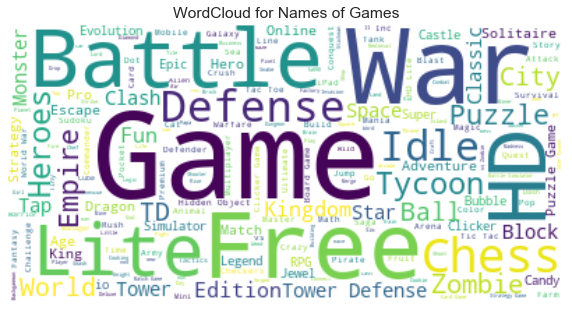

In [17]:
plt.figure(figsize=(10,6))
txt = " ".join(df.Name)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(regexp=r'[a-zA-Z]{2,}',stopwords=stopwords, background_color="white").generate(txt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("WordCloud for Names of Games")
plt.axis("off")
plt.show()

# <b>A simple Linear Regression for predicting size of games in future

In [18]:
X = df.iloc[:, 9:10]
y = df.iloc[:, 6:7]
X=X.dropna()
y=y.dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
clf = RandomForestRegressor(n_estimators=100, random_state=0)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)

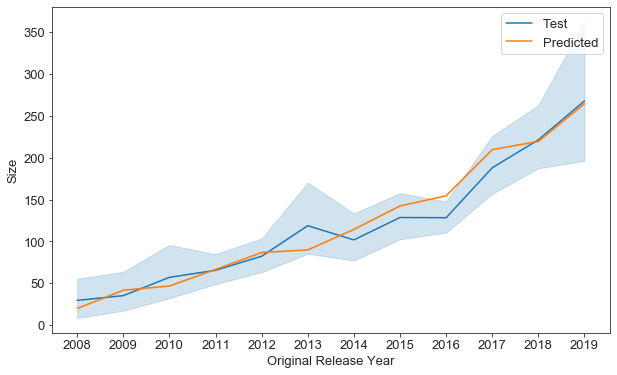

In [19]:
plt.figure(figsize=(10,6))
sns.lineplot(x = X_test['Original Release Year'], y = y_test['Size'])
sns.lineplot(x = X_test['Original Release Year'], y = y_pred.ravel())
plt.legend(labels=['Test', 'Predicted'])